## MovieLens Data Exploration and Recommendation Engine using Deep Learning

This data science project embarks on a comprehensive exploration of the expansive MovieLens dataset to unearth valuable insights about movie preferences and create an advanced recommendation engine. Leveraging deep learning techniques, the project combines data analysis, neural networks, and collaborative filtering to provide users with highly personalized movie recommendations based on their preferences.

The Dataset contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. 

#### Project Objectives:-

This project exploring the MovieLens dataset and creating a deep learning recommendation engine can benefit several groups of stakeholders:

**Movie Enthusiasts:** Movie lovers looking for personalized movie recommendations tailored to their tastes will benefit from this project. The recommendation engine will enhance their movie-watching experience by suggesting films they are more likely to enjoy.

**Streaming Platforms:** Streaming platforms like Netflix, Amazon Prime, or Hulu can benefit from the insights generated by this project. They can implement similar recommendation engines to increase user engagement, retention, and satisfaction. Improved recommendations can lead to longer subscriptions and increased revenue.

**Movie Studios and Distributors:** Understanding user preferences and genre trends can help movie studios and distributors make informed decisions about the types of films to produce, market, or acquire for distribution. This can optimize their investments and increase box office or streaming revenue.

**Content Creators:** Independent filmmakers and content creators can use insights from this project to understand what types of movies are popular among certain demographics. This knowledge can guide their creative and marketing strategies.

### Project Structure:-

The Project has the below structure:-

**1. Sourcing & Loading**
- Import relevant libraries
- Load the data 

**2. Cleaning, Transforming & Visualizing**
- Exploring the data
- Fix Missing Data
- Visualizing the Data
- Finding corr

**3. Feature Engineering**
- Feature Selection
- Feature Encoding
- One Hot Encoding

**4. Modelling**
- Logical Regression
- Random Forrest
- Other Models
- Hyperparameter Tuning
- Performance Evaluation

**5. Conclusion**
- Inference

### 1. Sourcing & Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
#load the Data

df_movies = pd.read_csv('Datasets\movie.csv')

In [3]:
df_gen_tag= pd.read_csv('Datasets\genome_tags.csv')

In [4]:
df_tags   = pd.read_csv(r'Datasets\tag.csv')

In [5]:
df_rating = pd.read_csv(r'Datasets\rating.csv')

In [6]:
df_gen_sco= pd.read_csv('Datasets\genome_scores.csv')

In [7]:
df_link  = pd.read_csv(r'Datasets\link.csv')

### 2. Cleaning, Transforming & Visualizing

#### Exploring the data

In [8]:
df_movies.name = 'Movies_DF'
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
df_gen_tag.name = 'Genome_Tag_DF'
df_gen_tag.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [10]:
df_tags.name = 'Tags_DF'
df_tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,4/24/2009 18:19
1,65,208,dark hero,5/10/2013 1:41
2,65,353,dark hero,5/10/2013 1:41
3,65,521,noir thriller,5/10/2013 1:39
4,65,592,dark hero,5/10/2013 1:41


In [11]:
df_rating.name = 'Ratings_DF'
df_rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [12]:
df_gen_sco.name = 'Genome_Score_DF'
df_gen_sco.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [13]:
df_link.name = 'Link_DF'
df_link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [14]:
def exploring_dfs(*dfs):
    for df in dfs:
        rows, cols = df.shape
        df_name = df.name if hasattr(df,'name') else 'Unnamed'
        print(f'\n{df_name} has {rows} Rows and {cols} Columns')
        #print(f'\n{df_name} has the below Summary:\n')
        #print(df.info())
        null_vals = df.isnull().sum()
        null_cols = null_vals[null_vals > 0]
        if not null_cols.empty:
            print(f'\n{df_name} has Null Values and they are as below:\n')
            for col, count in null_cols.items():
                print(f'- {col} has {count} Null Values')
                print(f'\n{df_name} has the below Summary:\n')
                print(df.info())
                print(df.describe())
        else:
            print(f'\n{df_name} has no Null Values')

In [15]:
exploring_dfs(df_movies, df_rating, df_tags, df_gen_tag, df_gen_sco,df_link)


Movies_DF has 27278 Rows and 3 Columns

Movies_DF has no Null Values

Ratings_DF has 20000263 Rows and 4 Columns

Ratings_DF has no Null Values

Tags_DF has 465564 Rows and 4 Columns

Tags_DF has Null Values and they are as below:

- tag has 16 Null Values

Tags_DF has the below Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  object
dtypes: int64(2), object(2)
memory usage: 14.2+ MB
None
              userId        movieId
count  465564.000000  465564.000000
mean    68712.354263   32627.762920
std     41877.674053   36080.241157
min        18.000000       1.000000
25%     28780.000000    2571.000000
50%     70201.000000    7373.000000
75%    107322.000000   62235.000000
max    138472.0

In [16]:
#Exploring the Movie DF
df_movies['year']  = df_movies['title'].str.extract(r'\((\d{4})\)')
df_movies['title'] = df_movies['title'].str[:-7] 

In [115]:
df_movies.shape

(27278, 23)

In [18]:
#Segregating the Genres of the Movies to find which Genre they belong
df_movies = df_movies.join(df_movies['genres'].str.get_dummies().astype(bool))

In [19]:
df_movies.drop(columns=['genres'],axis=1,inplace=True)

In [20]:
df_movies.rename(columns = {'(no genres listed)': ' No Genre'}, inplace=True)

In [21]:
df_movies.head()

,movieId,title,year,No Genre,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


From this Dataset, we can derive various insights like below:-

1. How many Movies are Released every Year?
2. How many Movies are released Every Year Genre wise?
3. What is the most popular Genre Type over the years?

##### 1. Finding the Number of Movies Released per Year and in last 15 years

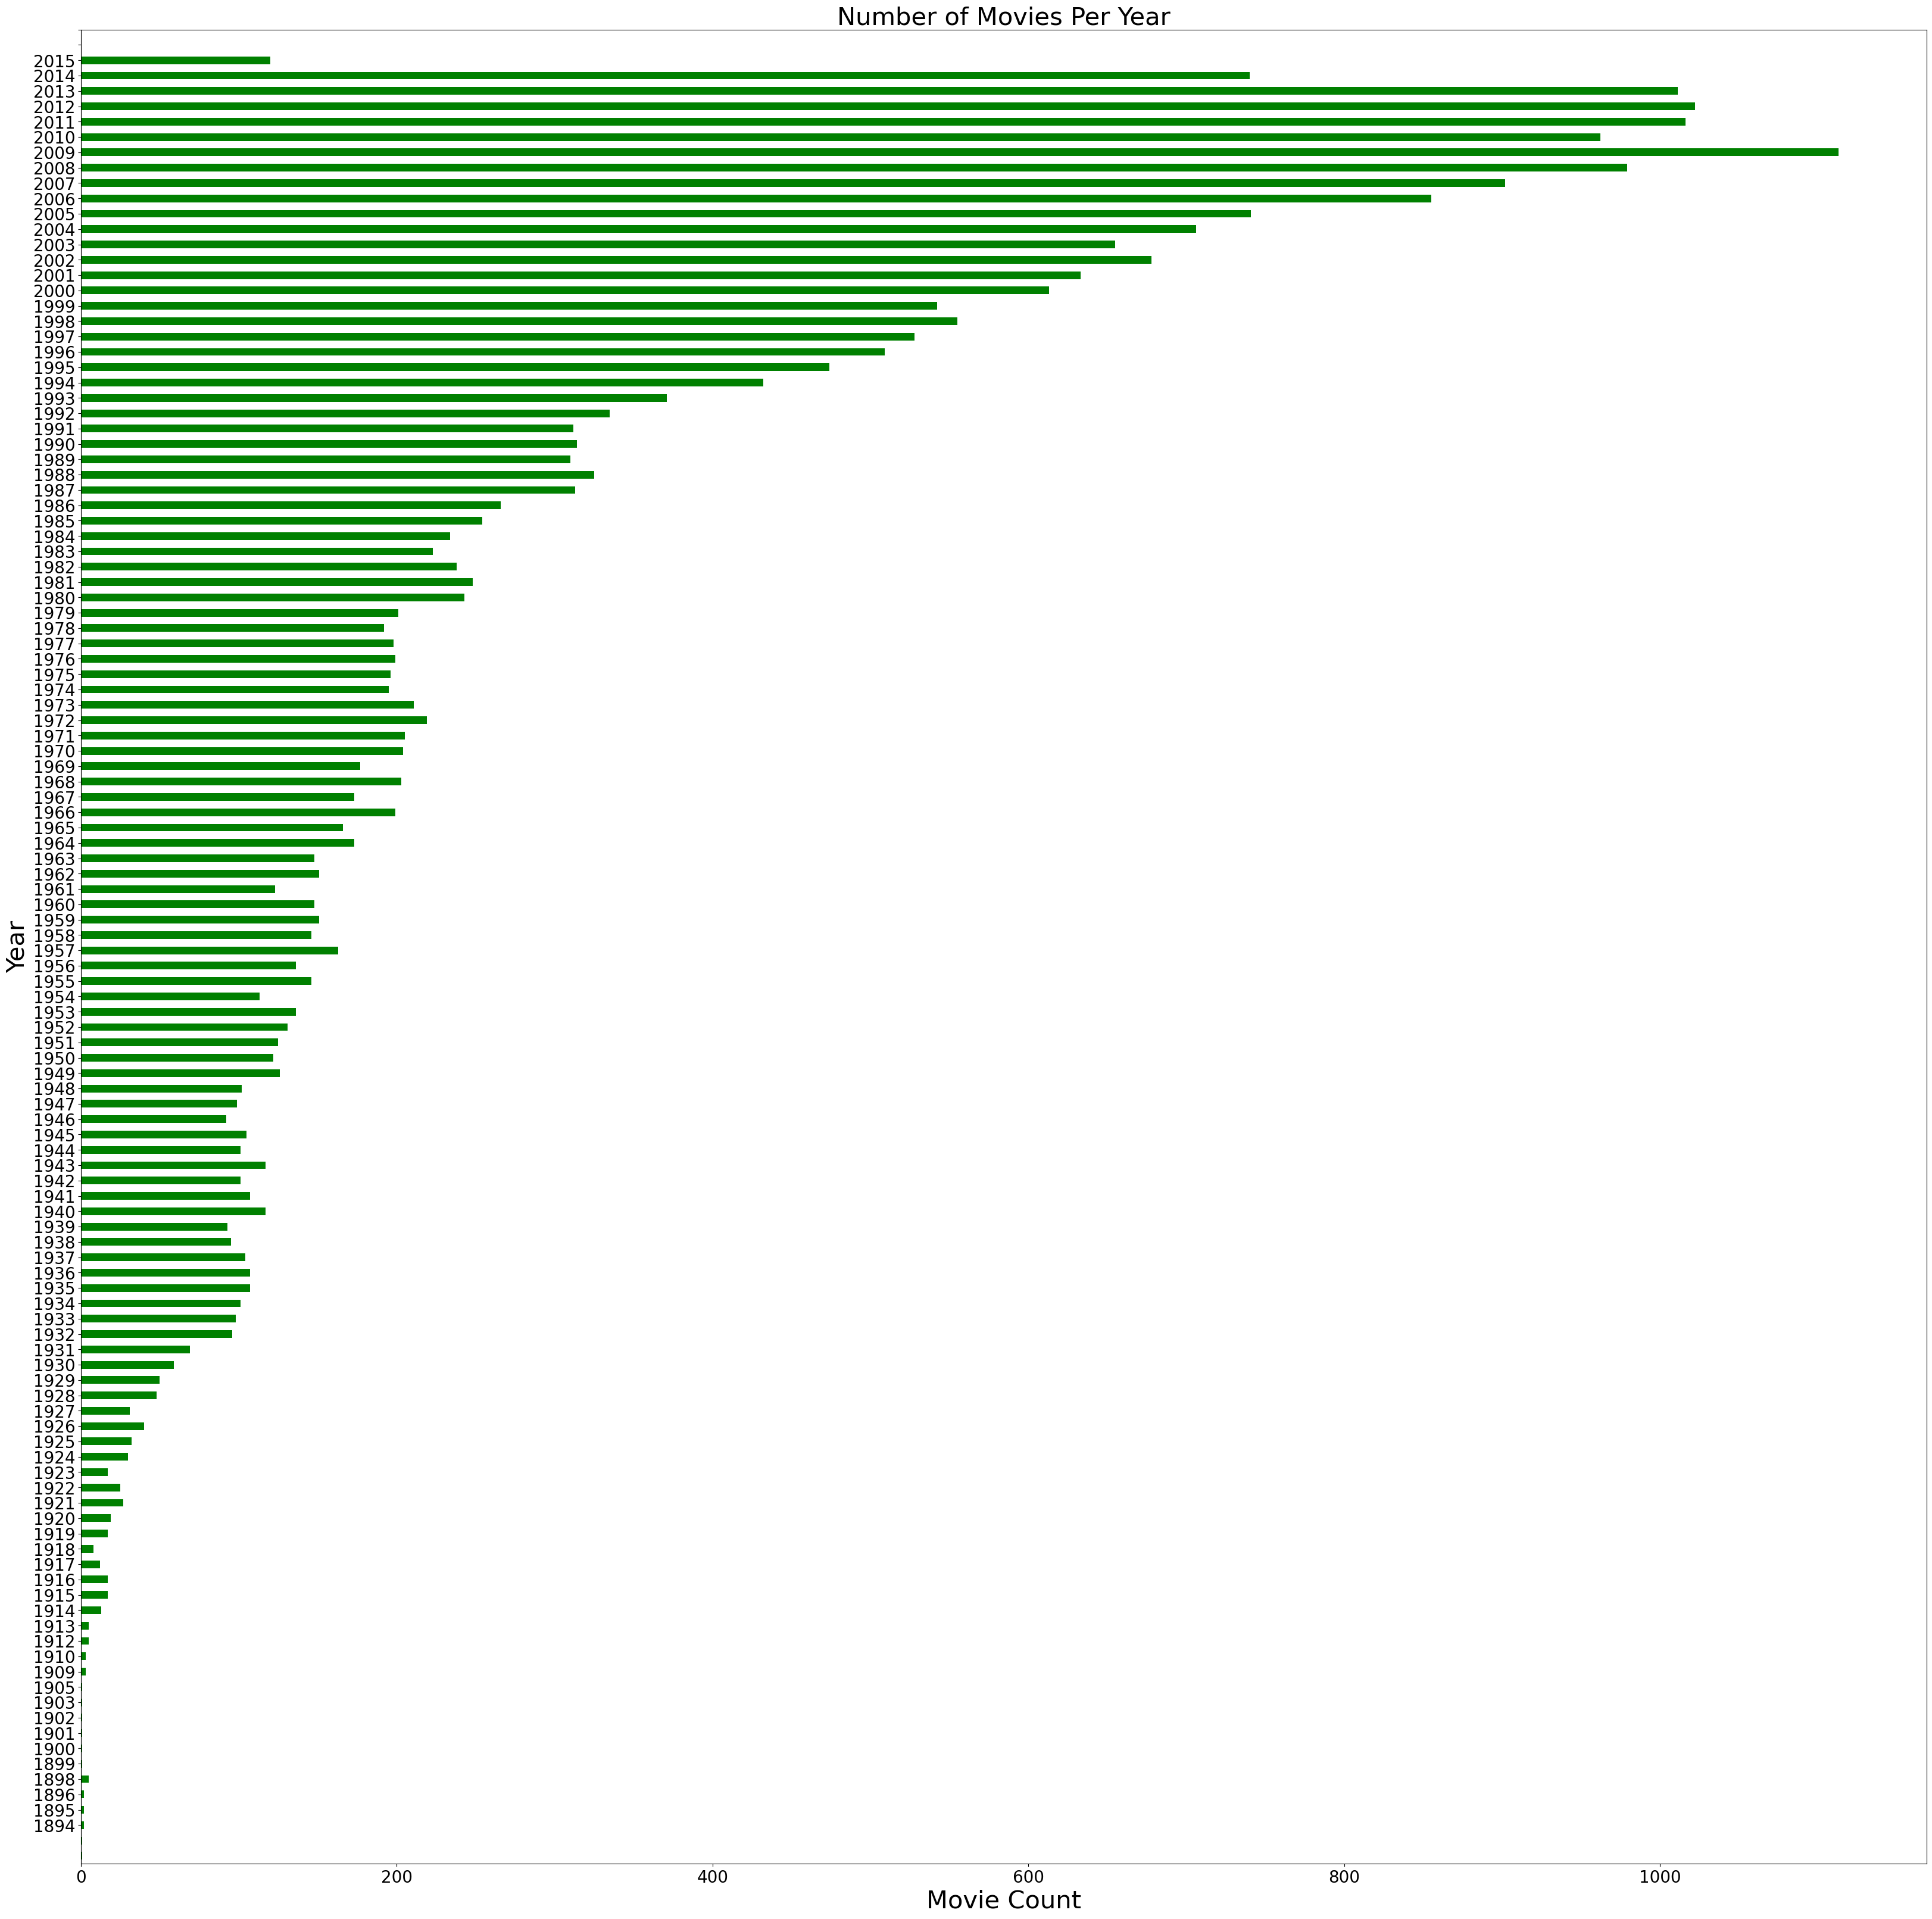

In [22]:
# Movie Count across years
movie_year = df_movies.groupby('year')['title'].count()
ax = movie_year.plot.barh(x='movies',y='year',figsize=(40,40),color='g')
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_title('Number of Movies Per Year',fontsize=30)
ax.set_xlabel('Movie Count',fontsize=30)
ax.set_ylabel('Year',fontsize=30)
label_spacing = 2
y_positions = [tick.get_position()[1] + label_spacing for tick in ax.get_yticklabels()]
ax.set_yticks(y_positions)
plt.show()
#ax.set_yticklabels(movie_year['year'])
#ax.set_yticklabels(movie_year['year']) 
#ax.tick_params(axis='x',labelsize=20)
#ax.tick_params(axis='y',labelsize=20)

In [23]:
# finding Movie Count in last 15 years
movies_15yrs = df_movies.groupby('year')['title'].count().tail(15)

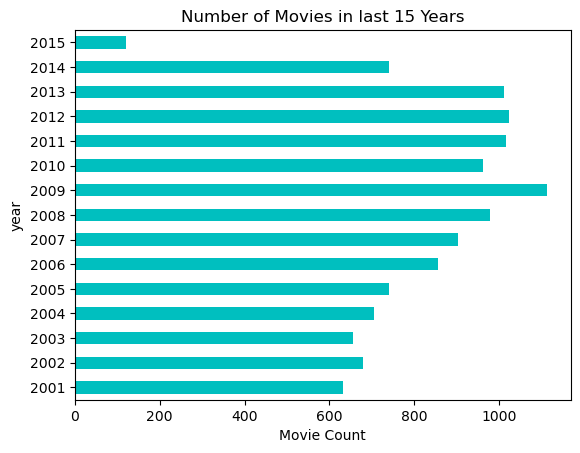

In [24]:
ax = movies_15yrs.plot.barh(x='movies',y='year', title= 'Number of Movies in last 15 Years',color='c')
ax.set_xlabel('Movie Count')
plt.show()

##### 2. Finding the Number of Genres of Movies released till date

In [25]:
melted_df1 = df_movies.copy()
melted_df1.drop(columns=['movieId', 'title'],axis=1,inplace=True)
#melted_df = melted_df1.melt(id_vars='year', var_name='Genre', value_name='Count')

In [26]:
melted_df = melted_df1.melt(id_vars='year', var_name='Genre', value_name='Count')

In [27]:
genre_count_till_date = melted_df.groupby('Genre')['Count'].sum().reset_index()

In [28]:
genre_count_till_date

,Genre,Count
0,No Genre,246
1,Action,3520
2,Adventure,2329
3,Animation,1027
4,Children,1139
5,Comedy,8374
6,Crime,2939
7,Documentary,2471
8,Drama,13344
9,Fantasy,1412


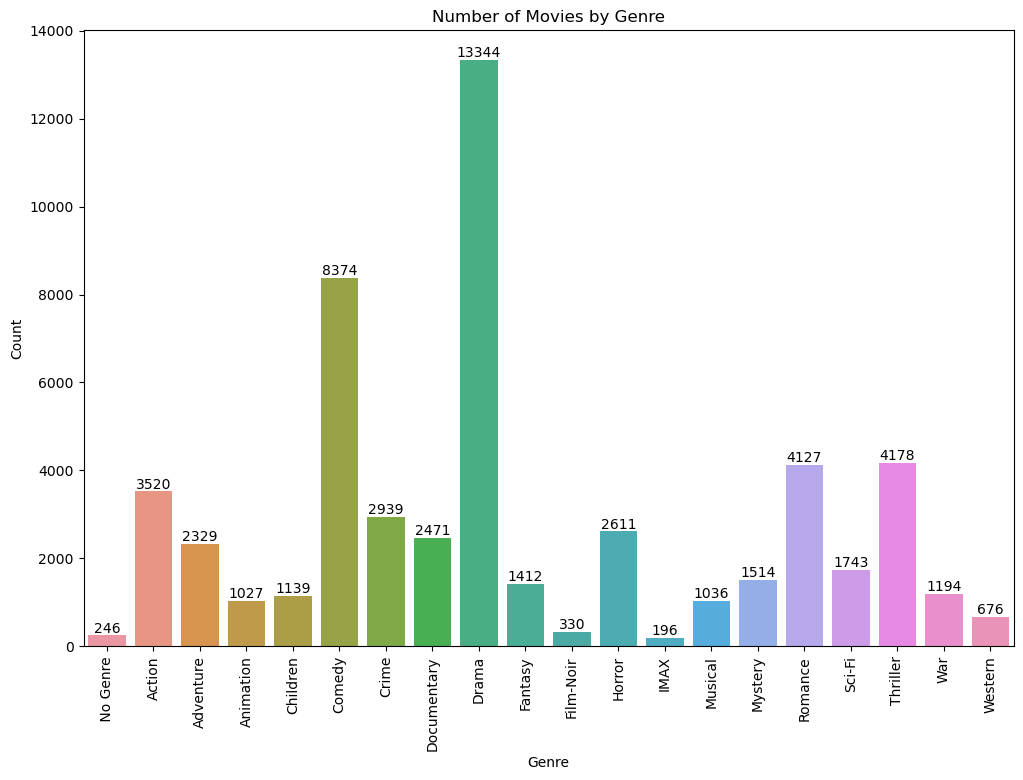

In [29]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=genre_count_till_date,x='Genre',y='Count')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Movies by Genre')
for index, row in genre_count_till_date.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom')

plt.show()

#### Drama seems to be the Most Popular Genre followed by Comedy & Thrillers. Romantic Movies follows very closely.

#### We now explore the Reting Dataset to derive meaningful insights from this. 

#### Let us now find the Popular Movies Rating Wise. We would explore the below questions:-

1. What are the Top 10 Highest Rated Movies in last 15 years?

2. Which Movie got the Highest Overall Rating in last 15 years?

3. What is the Count of Unique users who have rated in last 15 years?

4. Which Userid has given the highest number of Ratings?

In [33]:
df_rating['timestamp'] = pd.to_datetime(df_rating['timestamp'], errors='coerce')
df_rating['year'] = df_rating['timestamp'].dt.year
df_rating['month'] = df_rating['timestamp'].dt.month
df_rating['time'] = df_rating['timestamp'].dt.time
df_rating['date'] = df_rating['timestamp'].dt.date

In [34]:
# Finding the Unique Ratings we have along with the Count per year
print('Number of Unique Ratings:',df_rating['rating'].unique())

Number of Unique Ratings: [3.5 4.  3.  4.5 5.  2.  1.  2.5 0.5 1.5]


In [38]:
#Finding Counts of Ratings
df_rating['rating'].value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

In [39]:
# Finding the Average Rating
print('The Average Rating of Movies is:', round(df_rating['rating'].mean(),2))

The Average Rating of Movies is: 3.53


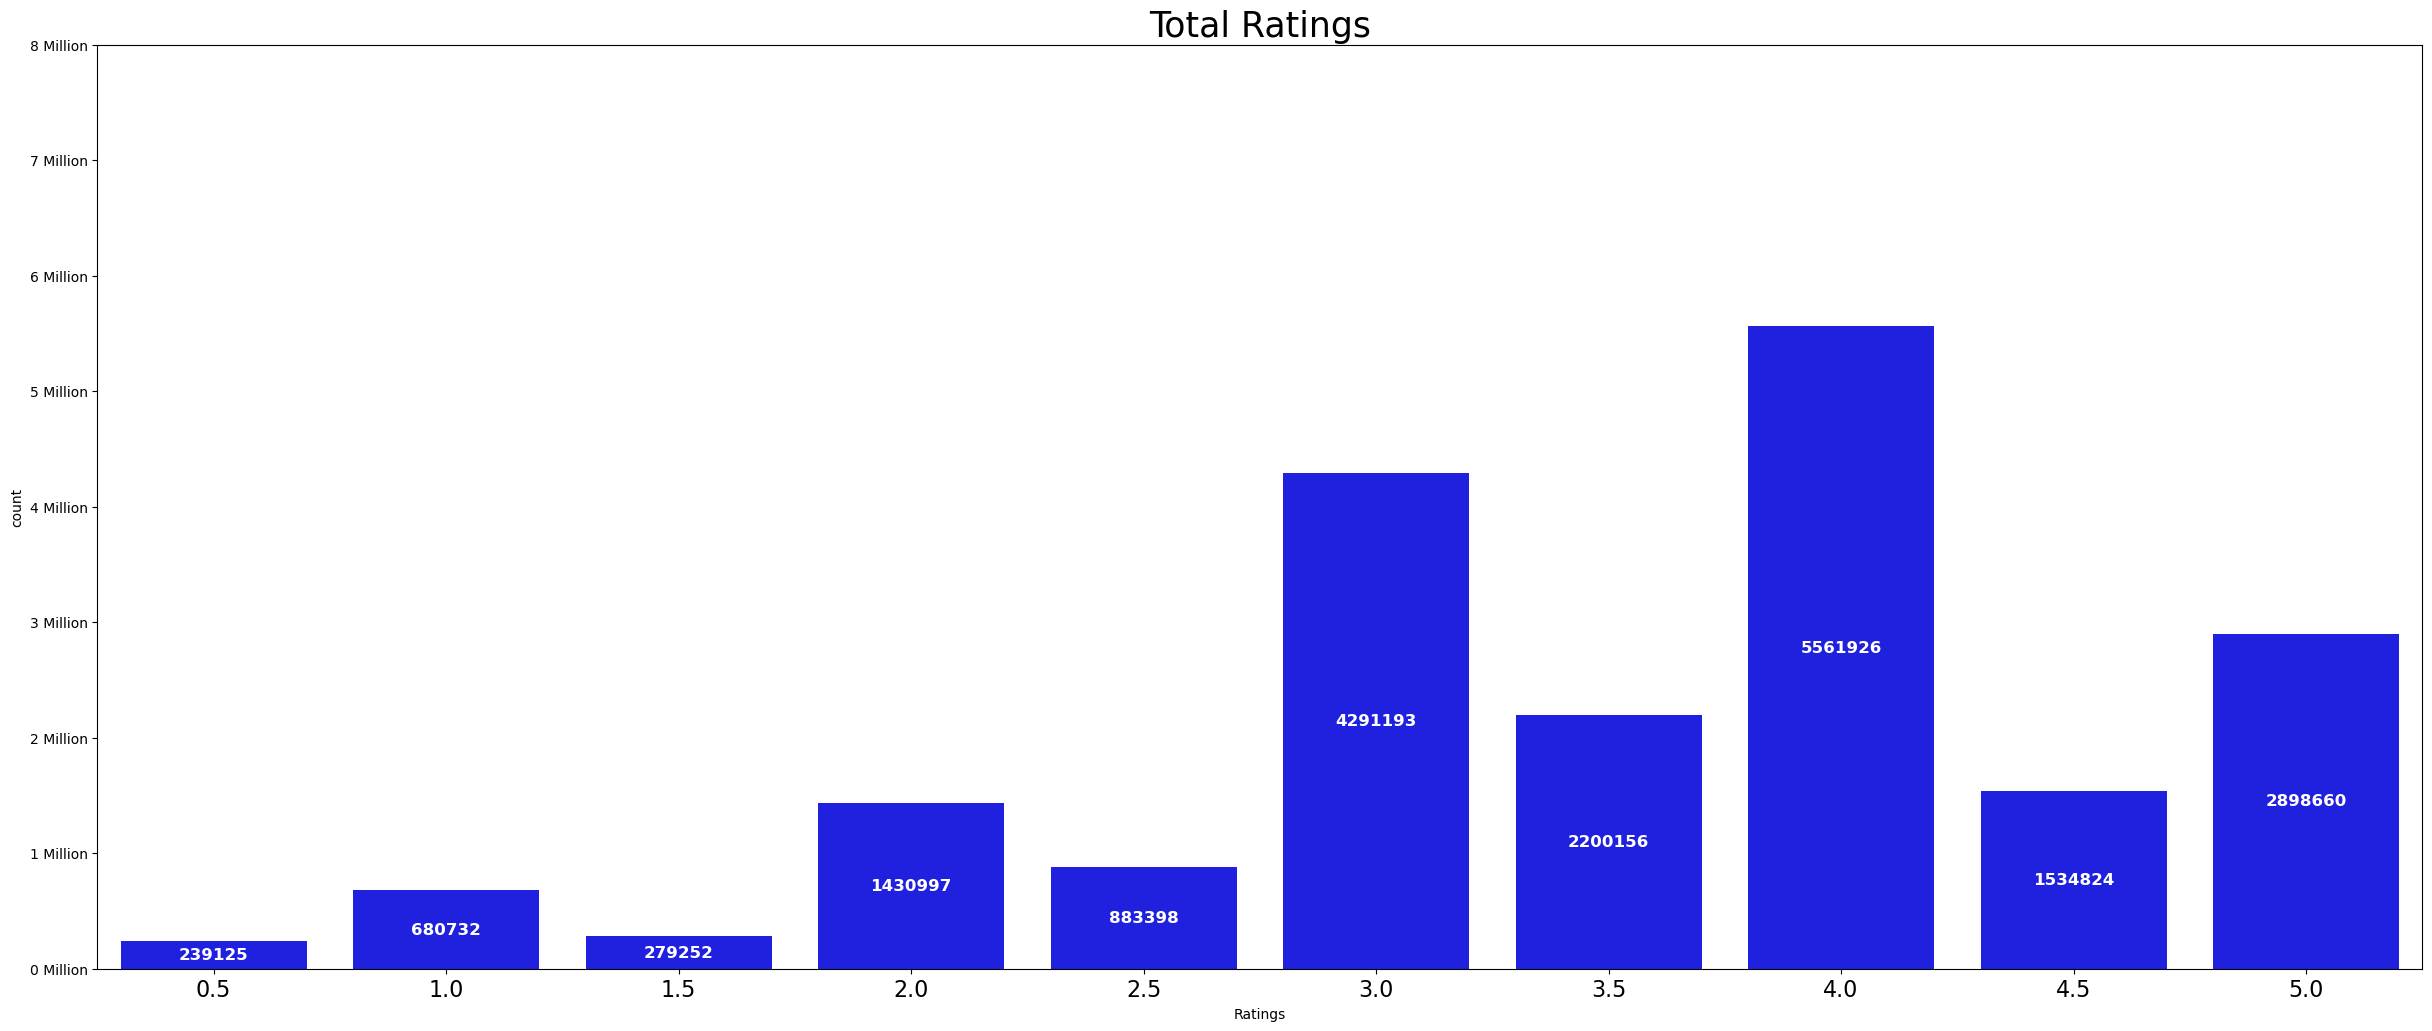

In [46]:
# Let us Visualize the Distribution of Rating in the Dataset
plt.figure(figsize= (30, 12))

ax = sns.countplot(data = df_rating, x ='rating',
            color = 'blue')
ax.set_ylim(0, 8000000)
ylabels = ['{:.0f}'.format(x) + ' Million' for x in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = i.get_height(), 
            ha = 'center', va ='center', size = 12, weight = 'bold', rotation = 0, color = 'white')
    
plt.title('Total Ratings', size= 25)
plt.xlabel("Ratings")
plt.xticks(size= 16)

plt.show()

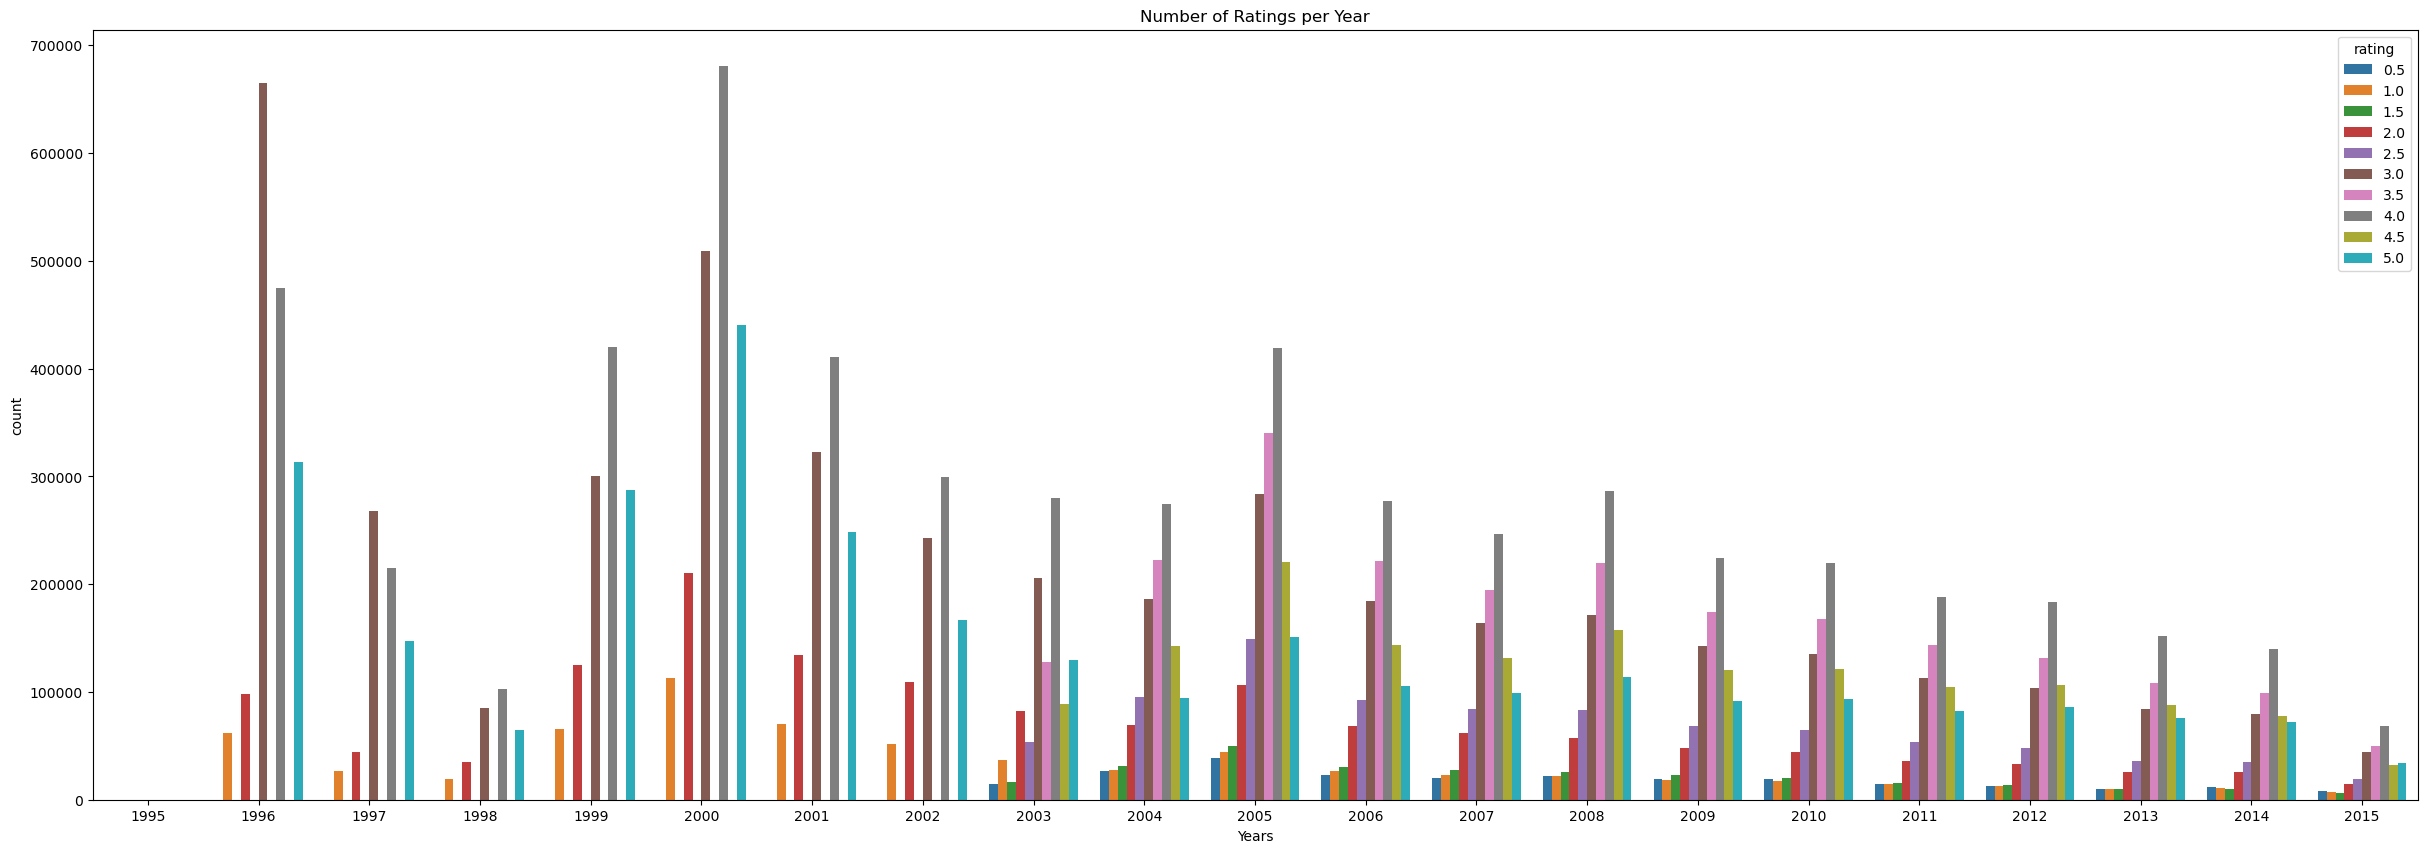

In [51]:
#Finding the Distribution of Rating across Years
plt.figure(figsize=(30,10))

sns.countplot(data=df_rating, x='year',hue='rating')
plt.xlabel('Years')
plt.title('Number of Ratings per Year')
plt.show()

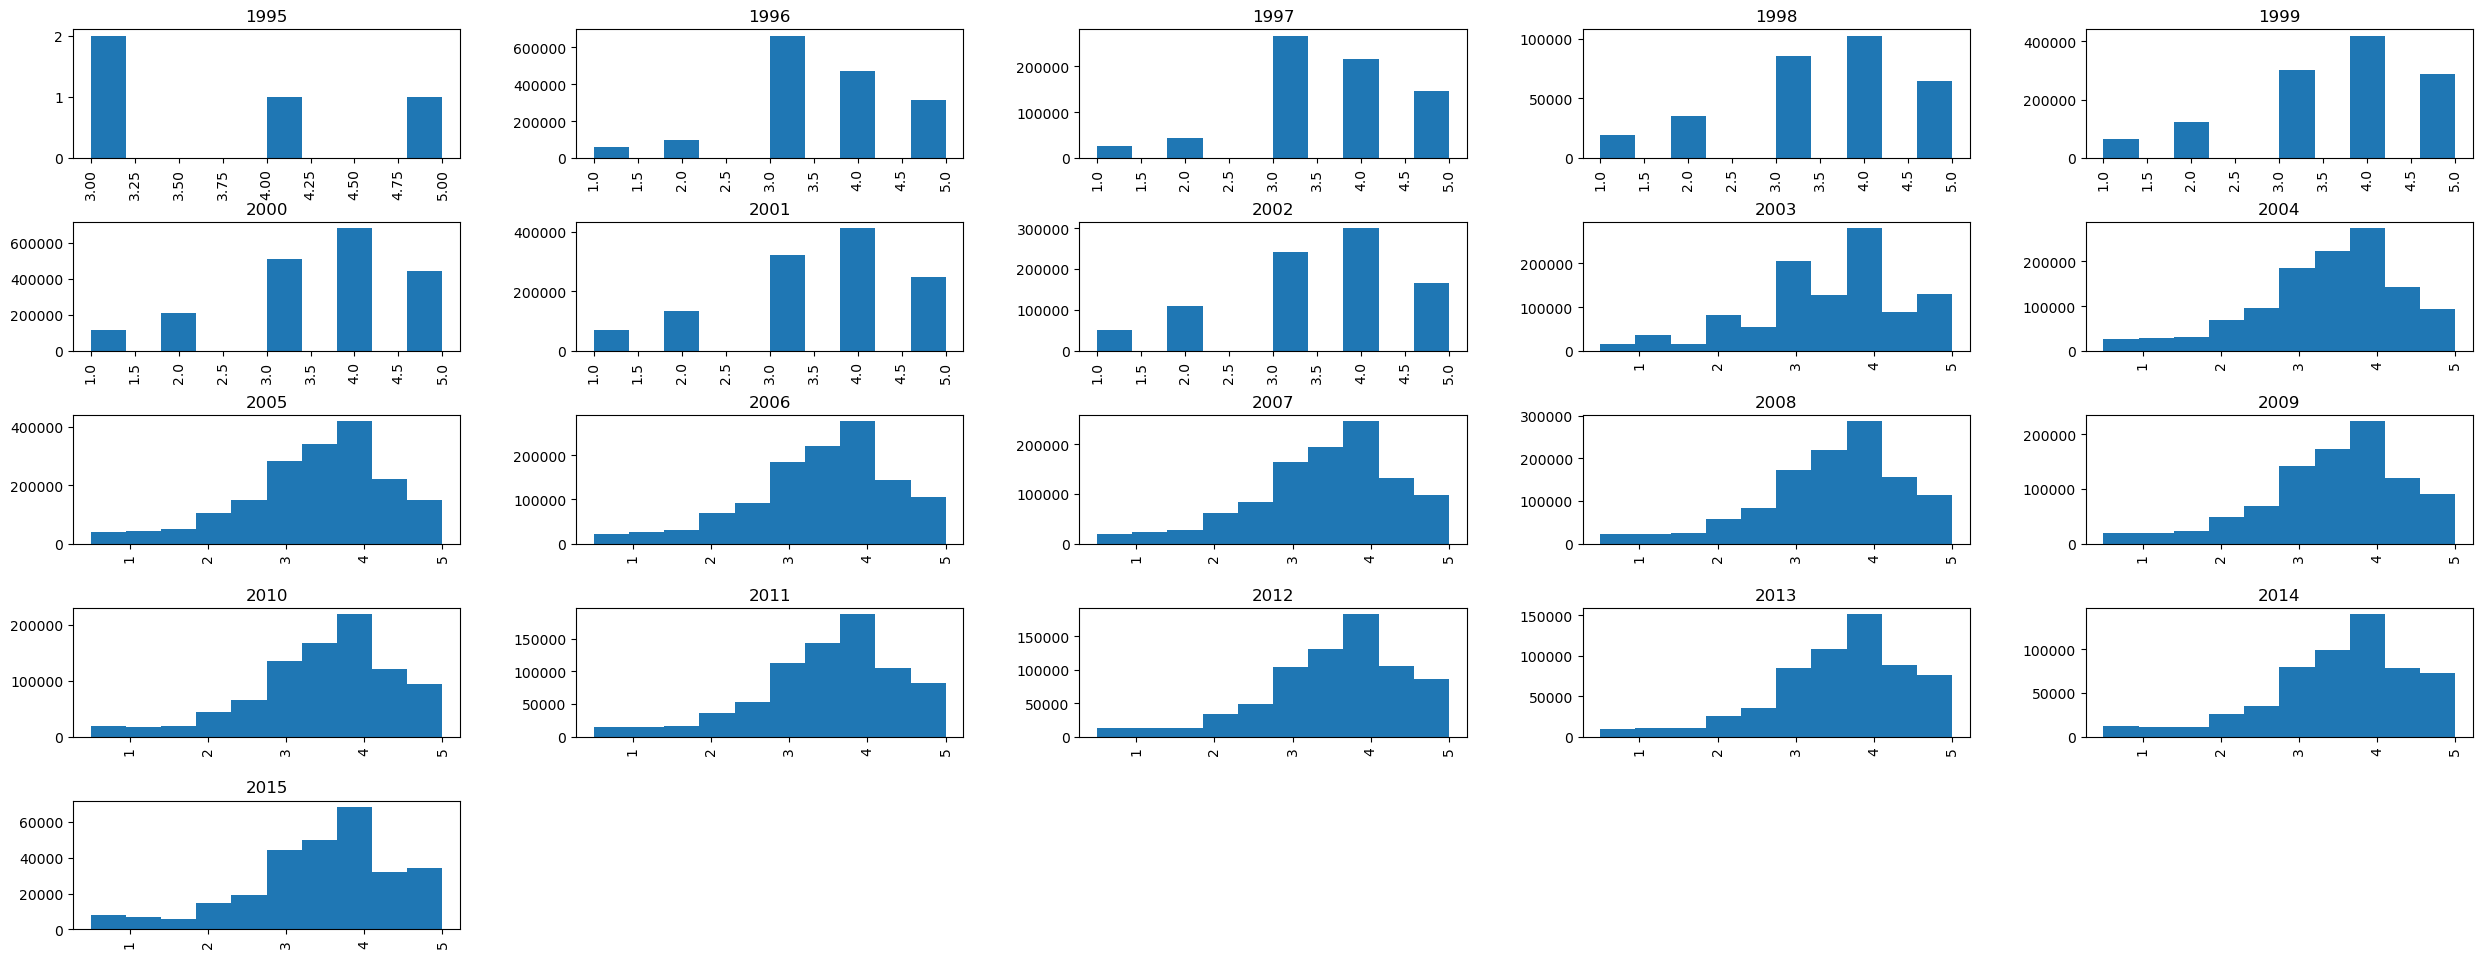

In [52]:
df_rating['rating'].hist(by=df_rating['year'], figsize=(30, 12));

In [57]:
#We join the Movies Dataset with Rating Dataset 

df_movie_rating = pd.merge(df_movies, df_rating,on='movieId')

In [58]:
df_movie_rating.head()

,movieId,title,year_x,No Genre,Action,Adventure,Animation,Children,Comedy,Crime,...,Thriller,War,Western,userId,rating,timestamp,year_y,month,time,date
0,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,3,4.0,1999-12-11 13:36:47,1999,12,13:36:47,1999-12-11
1,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,6,5.0,1997-03-13 17:50:52,1997,3,17:50:52,1997-03-13
2,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,8,4.0,1996-06-05 13:37:51,1996,6,13:37:51,1996-06-05
3,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,10,4.0,1999-11-25 02:44:47,1999,11,02:44:47,1999-11-25
4,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,11,4.5,2009-01-02 01:13:41,2009,1,01:13:41,2009-01-02


#### Let us now find the Popular Movies Rating Wise. We would explore the below questions:-

1. What are the Top 10 Highest Rated Movies in last 15 years?

2. Which Movie got the Highest Overall Rating in last 15 years?

3. What are the Top 10 Movies with highest number of User Ratings in last 15 years?

4. What is the Count of Unique users who have rated in last 15 years?

5. Which Userid has given the highest number of Ratings?

In [55]:
# Finding the Top 10 movies in last 15 years
current_year = pd.Timestamp.now().year

In [59]:
last_15_yrs_movies = df_movie_rating[df_movie_rating.year_y >= (current_year - 15)]

In [77]:
average_ratings = last_15_yrs_movies.groupby('title')['rating'].mean().reset_index()

In [78]:
top_10_movies = average_ratings.sort_values(by='rating',ascending=False)

In [84]:
top_10 = top_10_movies.head(10)

#### 1. What are the Top 10 Highest Rated Movies in last 15 years?

In [85]:
print('Top 10 Movies in last 15 Years are:\n',top_10)

Top 10 Movies in last 15 Years are:
                                   title  rating
20439  Snow Queen, The (Lumikuningatar)     5.0
22195                 The Color of Milk     5.0
19009                             Rosie     5.0
21436                        Sun Kissed     5.0
16705                           Oranges     5.0
7528         Eye In The Sky (Gun chung)     5.0
20358                       Small Roads     5.0
25389                       Yonkers Joe     5.0
21414      Summer Wishes, Winter Dreams     5.0
16114           No Distance Left to Run     5.0


#### 2. Which Movie got the Highest Overall Rating in last 15 years?

In [88]:
print('The Movie with the Highest Overall User Rating is', top_10['title'].iloc[0])

The Movie with the Highest Overall User Rating is Snow Queen, The (Lumikuningatar)


#### 3. What are the Top 10 Movies with highest number of User Ratings in last 15 years?

In [96]:
user_count = last_15_yrs_movies.groupby('title')['userId'].count().reset_index()

In [98]:
user_count= user_count.sort_values(by='userId',ascending=False)

In [99]:
top_10_by_user_ratings = user_count.head(10)

In [104]:
print('The Top 10 Movies to get Highest Number of User Ratings in last 15 years are:\n',top_10_by_user_ratings[['title','userId']])

The Top 10 Movies to get Highest Number of User Ratings in last 15 years are:
                                                    title  userId
5661                                    Dark Knight, The   20438
14532                                        Matrix, The   20117
19887                          Shawshank Redemption, The   19712
7907                                          Fight Club   19146
18017                                       Pulp Fiction   17812
8354                                        Forrest Gump   17358
13639  Lord of the Rings: The Fellowship of the Ring,...   17015
13640     Lord of the Rings: The Return of the King, The   16227
13641             Lord of the Rings: The Two Towers, The   15572
20094                          Silence of the Lambs, The   15089


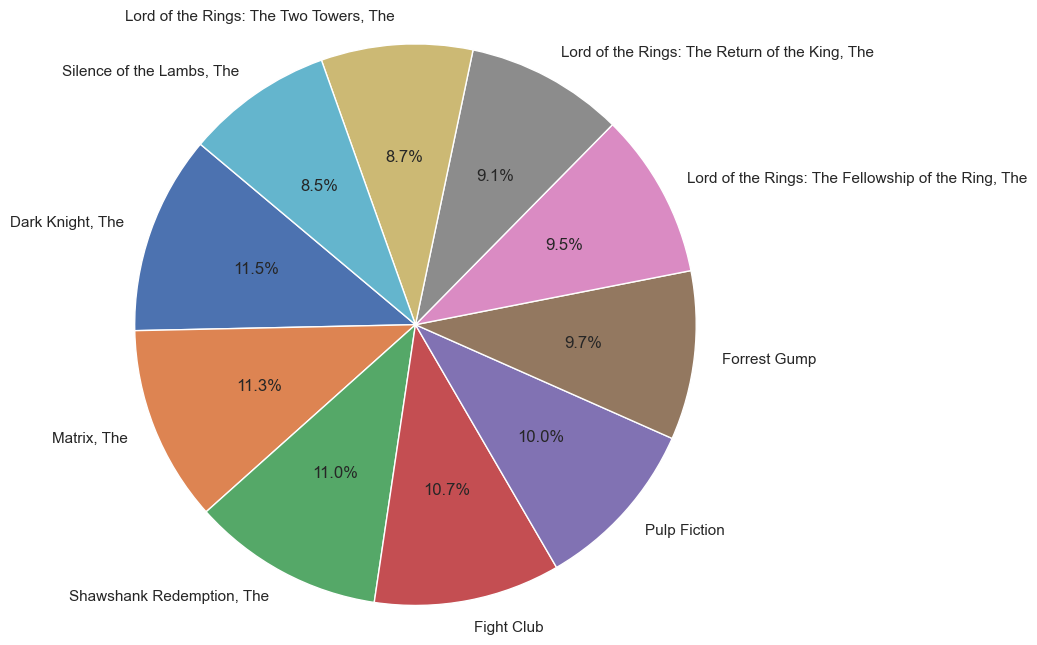

In [114]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_by_user_ratings['userId'], labels=top_10_by_user_ratings['title'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### 4. What is the Count of Unique users who have rated in last 15 years?

In [94]:
unique_users_count = last_15_yrs_movies['userId'].nunique()

In [105]:
print("Number of Unique User Id's to Rate Movies in last 15 years is",unique_users_count)

Number of Unique User Id's to Rate Movies in last 15 years is 42724


#### 5. Which Userid has given the highest number of Ratings?

In [111]:
user_id_rating = last_15_yrs_movies.groupby('userId')['rating'].count().reset_index()
user_id_rating = user_id_rating.sort_values(by='rating',ascending=False)
user_id_rating = user_id_rating.head(10)
user_id_rating

,userId,rating
40716,131904,5330
40324,130767,4785
4830,15617,4354
14445,46470,4094
19642,63147,3958
40229,130459,3908
9734,31122,3742
5674,18138,3650
28559,92269,3508
32650,105580,3449


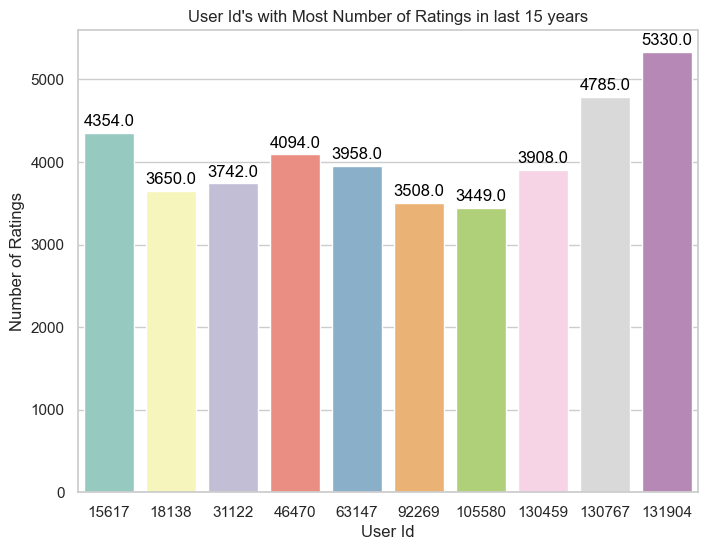

In [113]:
#Let us visualize the Top 10 User id's who have given the highest number of Ratings

sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))  
ax = sns.barplot(x=user_id_rating['userId'], y=user_id_rating['rating'], palette="Set3")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("User Id's with Most Number of Ratings in last 15 years")
plt.xlabel('User Id')
plt.ylabel('Number of Ratings')
plt.show()